## Importing Libraries

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
import sklearn
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import pickle

## Loading the pre-processed data

In [3]:
data = pd.read_csv("pre_processed_data_with_top_comment_latest.csv")

In [5]:
flairs = ["Non-Political", "Scheduled", "AskIndia", "Science/Technology", "Politics",
          "Business/Finance", "Policy/Economy", "Sports", "Food"]

## Creating a column for combined text of Title, Body and Comments

In [6]:
all_data = data["title"].fillna('') + data["body"].fillna('') + data["comments"].fillna('')
data = data.assign(all_data = all_data)
data.head()

,flair,title,url,comms_num,body,author,comments,all_data
0,Non-Political,indian state ut renamed country similar popula...,https://i.redd.it/hk9o11b8dun41.png,20,NaN,schadenfeuder,nice name uttar pradesh ajay bisht gonna happy...,indian state ut renamed country similar popula...
1,Non-Political,hotstar finally uploads sunday last week tonig...,https://www.hotstar.com/in/tv/last-week-tonigh...,12,NaN,TimeVendor,first turning internet entire state refusing b...,hotstar finally uploads sunday last week tonig...
2,Non-Political,best nonpolitical stand comedian,https://www.reddit.com/r/india/comments/g3zbrt...,9,thing related politics give anxiety recommend ...,daredevil005,abhishek upmanyu kenny sebastian biswa anubhav...,best nonpolitical stand comedianthing related ...
3,Non-Political,icse isc exam postponed due covid19 nonpolitical,https://cisce.org//UploadedFiles/PDF/COVID%201...,0,NaN,DSMalhotra,NaN,icse isc exam postponed due covid19 nonpolitical
4,Non-Political,nonpolitical friend wrote first book week givi...,https://www.reddit.com/r/india/comments/ezqw6i...,0,friend mine wrote first book music men volume ...,bitswreck,NaN,nonpolitical friend wrote first book week givi...


## Linear Support Vector Machine Model

### Used GridSearch for Hyper-Parameter Tuning of the Model

In [7]:
def lsvm(X_train, X_test, y_train, y_test):
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import SGDClassifier
    
    param_grid = {'clf__max_iter': [1, 5, 10, 20, 50, 100],
              'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'clf__penalty': ["none", "l1", "l2"],
              'clf__loss' : ["hinge"]}
    
    pipeline = Pipeline([('vect', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('clf', SGDClassifier()),
                        ])
    
    classifier = GridSearchCV(pipeline, param_grid = param_grid)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred,target_names=flairs))
    print("Best Params: ", classifier.best_params_)

def train_test_lsvm(X,y):
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
    print("Results of Linear SVM")
    lsvm(X_train, X_test, y_train, y_test)
    
train_test_lsvm(data.all_data, data.flair)  

Results of Linear SVM


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sk

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_m

accuracy 0.7716346153846154
                    precision    recall  f1-score   support

     Non-Political       0.53      0.84      0.65        51
         Scheduled       0.80      0.80      0.80        45
          AskIndia       0.75      0.70      0.72        43
Science/Technology       0.89      0.72      0.79        43
          Politics       0.80      0.74      0.76        53
  Business/Finance       0.79      0.67      0.73        46
    Policy/Economy       0.89      0.78      0.83        54
            Sports       0.82      0.92      0.87        39
              Food       0.92      0.79      0.85        42

          accuracy                           0.77       416
         macro avg       0.80      0.77      0.78       416
      weighted avg       0.80      0.77      0.78       416

Best Params:  {'clf__alpha': 0.001, 'clf__loss': 'hinge', 'clf__max_iter': 20, 'clf__penalty': 'l1'}


#### LSVM received accuracy of 77.16% for parameters {'clf__alpha': 0.001, 'clf__loss': 'hinge', 'clf__max_iter': 20, 'clf__penalty': 'l1'}

## Logistic Regression Model

In [6]:
def logisticreg(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression

    logreg = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', LogisticRegression(n_jobs=1, C=1e5)),
                 ])
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred,target_names=flairs))
    
def train_test_logisticreg(X,y):
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
    print("Results of Logistic Regression")
    logisticreg(X_train, X_test, y_train, y_test)
    
train_test_logisticreg(data.all_data, data.flair)   

Results of Logistic Regression


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.7596153846153846
                    precision    recall  f1-score   support

     Non-Political       0.81      0.75      0.78        51
         Scheduled       0.80      0.82      0.81        45
          AskIndia       0.78      0.74      0.76        43
Science/Technology       0.84      0.63      0.72        43
          Politics       0.72      0.74      0.73        53
  Business/Finance       0.60      0.78      0.68        46
    Policy/Economy       0.81      0.70      0.75        54
            Sports       0.76      0.87      0.81        39
              Food       0.80      0.83      0.81        42

          accuracy                           0.76       416
         macro avg       0.77      0.76      0.76       416
      weighted avg       0.77      0.76      0.76       416



#### Logistic Regression received accuracy of 75.96%

## Multinomial Naive Bayes Model

In [5]:
def mnb(X_train, X_test, y_train, y_test):
  
  from sklearn.naive_bayes import MultinomialNB

  nb = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('clf', MultinomialNB()),
                ])
  nb.fit(X_train, y_train)

  y_pred = nb.predict(X_test)

  print('accuracy %s' % accuracy_score(y_pred, y_test))
  print(classification_report(y_test, y_pred,target_names=flairs))

def train_test_mnb(X,y):
 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

  print("Results of Naive Bayes Classifier")
  mnb(X_train, X_test, y_train, y_test)
    
train_test_mnb(data.all_data, data.flair)  

Results of Naive Bayes Classifier
accuracy 0.6185897435897436
                    precision    recall  f1-score   support

     Non-Political       0.67      0.53      0.59        38
         Scheduled       0.39      0.82      0.53        40
          AskIndia       0.78      0.71      0.75        35
Science/Technology       1.00      0.10      0.19        29
          Politics       0.60      0.66      0.63        41
  Business/Finance       0.53      0.74      0.62        27
    Policy/Economy       0.83      0.47      0.60        40
            Sports       0.75      0.75      0.75        32
              Food       0.92      0.73      0.81        30

          accuracy                           0.62       312
         macro avg       0.72      0.61      0.61       312
      weighted avg       0.71      0.62      0.61       312



#### MNB received accuracy of 61.85%

## Random Forest Model

In [10]:
def randomforest(X_train, X_test, y_train, y_test):
  
  from sklearn.ensemble import RandomForestClassifier
  
  rf = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', RandomForestClassifier(n_estimators = 1000, random_state = 42)),
                 ])
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)

  print('accuracy %s' % accuracy_score(y_pred, y_test))
  print(classification_report(y_test, y_pred,target_names=flairs))
    
def train_test_rf(X,y):
 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

  print("Results of Random Forest")
  randomforest(X_train, X_test, y_train, y_test)
    
train_test_rf(data.all_data, data.flair)      

Results of Random Forest
accuracy 0.7980769230769231
                    precision    recall  f1-score   support

     Non-Political       0.82      0.80      0.81        51
         Scheduled       0.76      0.91      0.83        45
          AskIndia       0.91      0.74      0.82        43
Science/Technology       0.80      0.74      0.77        43
          Politics       0.79      0.72      0.75        53
  Business/Finance       0.56      0.83      0.67        46
    Policy/Economy       0.95      0.72      0.82        54
            Sports       0.89      0.87      0.88        39
              Food       0.88      0.88      0.88        42

          accuracy                           0.80       416
         macro avg       0.82      0.80      0.80       416
      weighted avg       0.82      0.80      0.80       416



#### Random Forest model has achieved the highest accuracy at 79.80%.

## Using GridSearch for further improving Random Forest Model

In [13]:
def randomforest(X_train, X_test, y_train, y_test):
  
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import GridSearchCV  
  
  param_grid = {'clf__n_estimators': [100, 500, 1000, 2000],
              'clf__max_features': ['auto', 'sqrt'],
              'clf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'clf__bootstrap': [True, False]}

  pipeline = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', RandomForestClassifier()),
                 ])
  
  classifier = GridSearchCV(pipeline, param_grid = param_grid)
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  print('accuracy %s' % accuracy_score(y_pred, y_test))
  print(classification_report(y_test, y_pred,target_names=flairs))
  print("Best Params: ", classifier.best_params_)
    
def train_test_rf(X,y):
 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

  print("Results of Random Forest")
  randomforest(X_train, X_test, y_train, y_test)
    
train_test_rf(data.all_data, data.flair)   

Results of Random Forest


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


accuracy 0.8028846153846154
                    precision    recall  f1-score   support

     Non-Political       0.83      0.84      0.83        51
         Scheduled       0.74      0.89      0.81        45
          AskIndia       0.92      0.81      0.86        43
Science/Technology       0.76      0.74      0.75        43
          Politics       0.80      0.74      0.76        53
  Business/Finance       0.61      0.83      0.70        46
    Policy/Economy       0.95      0.69      0.80        54
            Sports       0.89      0.87      0.88        39
              Food       0.86      0.86      0.86        42

          accuracy                           0.80       416
         macro avg       0.82      0.81      0.81       416
      weighted avg       0.82      0.80      0.80       416

Best Params:  {'clf__bootstrap': True, 'clf__max_depth': 70, 'clf__max_features': 'auto', 'clf__n_estimators': 2000}


#### Random Forest model with the parameters {'clf__bootstrap': True, 'clf__max_depth': 70, 'clf__max_features': 'auto', 'clf__n_estimators': 2000} achieved the highest accuracy at 80.28%.

## Running and Saving the Random Forest model with the best parameters

## Analysis of the Random Forest Model

Results of Random Forest
accuracy 0.8028846153846154
                    precision    recall  f1-score   support

     Non-Political       0.82      0.78      0.80        51
         Scheduled       0.77      0.89      0.82        45
          AskIndia       0.88      0.81      0.84        43
Science/Technology       0.78      0.74      0.76        43
          Politics       0.78      0.74      0.76        53
  Business/Finance       0.63      0.83      0.72        46
    Policy/Economy       0.95      0.72      0.82        54
            Sports       0.87      0.87      0.87        39
              Food       0.84      0.88      0.86        42

          accuracy                           0.80       416
         macro avg       0.81      0.81      0.81       416
      weighted avg       0.81      0.80      0.80       416



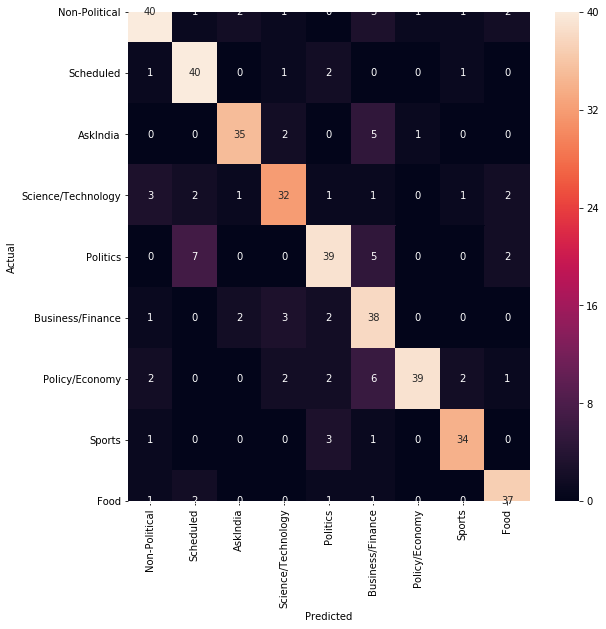

In [8]:
def randomforest(X_train, X_test, y_train, y_test):
  
  from sklearn.ensemble import RandomForestClassifier
  
  rf = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', RandomForestClassifier(n_estimators = 2000, max_depth = 70, max_features = 'auto', 
                   bootstrap = True, random_state = 42)),
                 ])
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)

  print('accuracy %s' % accuracy_score(y_pred, y_test))
  print(classification_report(y_test, y_pred,target_names=flairs))
  #joblib.dump(rf, 'rf_model.pkl')

  from sklearn.metrics import confusion_matrix
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(9,9))
  sns.heatmap(conf_mat, annot=True, fmt='d',
              xticklabels=flairs, yticklabels=flairs)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
    
def train_test_rf(X,y):
 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

  print("Results of Random Forest")
  randomforest(X_train, X_test, y_train, y_test)
    
    
train_test_rf(data.all_data, data.flair) 

#### The Confusion Matrix of our Random Forest Classifier trained for the parameters {'clf__bootstrap': True, 'clf__max_depth': 70, 'clf__max_features': 'auto', 'clf__n_estimators': 2000} shows that our model is very accurate in detecting the flairs "Food", "Sports", "Scheduled" and "Non-Political". This can be attributed to the fact that these particular flairs have decently unique top uni-grams and bi-grams, which aid in accurately detecting the flair of the Reddit post.

#### On the other hand, the groups of flairs like "Policy/Economy" and "Business/Finance", or "Politics" and "Business/Finance" have a few common top uni-grams and bi-grams, which can be attributed to the significantly larger Body and Comments word count of these flairs, which dilute the topic to some extent. The use of only the top 3 comments from the CommentForest, extracted after sorting the forest by "Top" posts helped mitigate the issue to a reasonably low degree.